## Dimensionality Reduction


### Principal Component Analysis  
``` python
from sklearn.decomposition import PCA
```

- pca.explained_variance_:  
可以看出各維度的離散狀況  

- pca.components_:  
得到特徵向量  

PCA allows only <span style="color:red">linear transforms</span> from the original data point to the new data point.  
Let $\mu$ = $\frac{1}{n}\sum X_i$  
Let $\sigma_j$ = $\frac{1}{n}\sum_i X_{ij}^2$  

先將資料減去平均值$\mu$再除以標準差$\sigma$  

給單位向量$u_1$, 有一點x  
the length of the projection of x onto $u_1$ is given by $x*u_1 = x^Tu_1$  
我們希望投影到該向量上可以最大化表達原來的資料x  
等於是投射到該向量後呈現的散度越散越好, 也可以說是投射完的長度越長越好  
所以問題變成:  
<span style="color:red">
Select a unit-length $u_1$ to maximize  $\frac{1}{n}\sum(x_i^Tu_1)^2$  
Subject to $||u_1||=1$  
</span>
其中  
$\frac{1}{n}\sum(x_i^Tu_1)^2 = \frac{1}{n}\sum(u_1^Tx_ix_i^Tu_1) = u_1^T (\frac{1}{n}\sum x_i x_i^T) u_1$  
令convariance matrix $\frac{1}{n}\sum x_i x_i^T = \Sigma$  
 
By Lagrange Multiplier:  
$\mathcal{L} = u_1^T \Sigma u_1 +\lambda (1-u_1^Tu_1)$  
微分設為0:  
$\frac{\partial \mathcal{L}}{\partial u_1} = 2\Sigma u_1 - 2\lambda u_1 = 0$  
$\Sigma u_1 = \lambda u_1$  
因為$\lambda$是純數, $\Sigma$為矩陣  
可以知道$u_1$為$\Sigma$的特徵向量, 其特徵值為$\lambda$  
$u_1$ is an eigenvector of $\Sigma$ with eigenvalue $\lambda$  

PCA是線性轉換，使得資料的各特徵的非線性結構在低維度空間無法被呈現，原本是相遠的點，在降維之後有可能被拉近

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline


(200, 2)


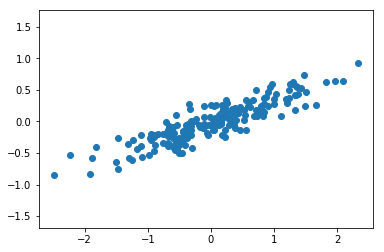

In [6]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
print(X.shape)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

### 用PCA找出最合適投影的特徵向量

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

[0.7625315 0.0184779]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


0.7625315008826115 [-0.94446029 -0.32862557]
[-2.47419458 -0.86089761]
0.018477895513562572 [-0.32862557  0.94446029]
[-0.1340136   0.38515116]


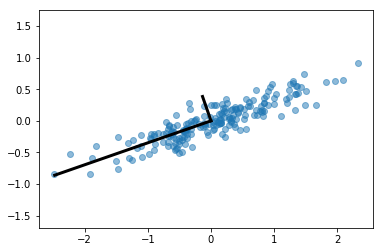

In [24]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    print(length, vector)
    v = vector * 3 * np.sqrt(length)
    print(v)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

### PCA指定variance的方式得到降維過的資料X

In [35]:
pca = PCA(0.95) # keep 95% of variance
X_trans = pca.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


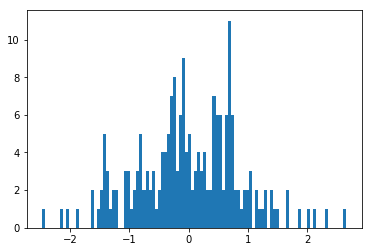

In [65]:
plt.hist(X_trans, bins=100)
plt.show()

### 降維過的資料X可以用inverse_transform()轉回到原本維度上

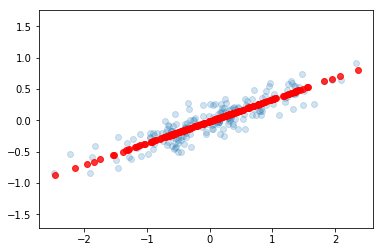

In [42]:
X_new = pca.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob',c='r', alpha=0.8)
plt.axis('equal');
plt.show()

### Application of PCA to Digits

(1797, 64)
(1797, 2)


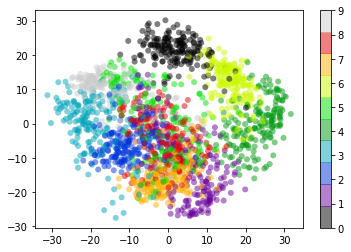

In [44]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
pca = PCA(2)  # project from 64 to 2 dimensions
Xproj = pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

### 用cumulative explained variance來評估要降低的維度
可以看出多少維度可以代表資料的變異程度

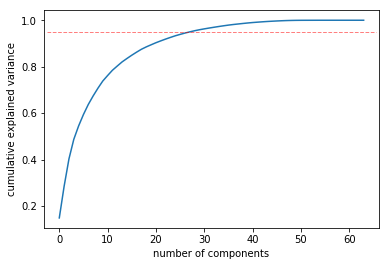

In [61]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=.95, xmin=0.01, xmax=0.99,linewidth=1, linestyle='--',color='r', alpha=0.5)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Other Dimensionality Reducting Routines

Note that scikit-learn contains many other unsupervised dimensionality reduction routines: some you might wish to try are
Other dimensionality reduction techniques which are useful to know about:

- [sklearn.decomposition.PCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.PCA.html): 
   Principal Component Analysis
- [sklearn.decomposition.RandomizedPCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.RandomizedPCA.html):
   extremely fast approximate PCA implementation based on a randomized algorithm
- [sklearn.decomposition.SparsePCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.SparsePCA.html):
   PCA variant including L1 penalty for sparsity
- [sklearn.decomposition.FastICA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.FastICA.html):
   Independent Component Analysis
- [sklearn.decomposition.NMF](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.NMF.html):
   non-negative matrix factorization
- [sklearn.manifold.LocallyLinearEmbedding](http://scikit-learn.org/0.13/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html):
   nonlinear manifold learning technique based on local neighborhood geometry
- [sklearn.manifold.IsoMap](http://scikit-learn.org/0.13/modules/generated/sklearn.manifold.Isomap.html):
   nonlinear manifold learning technique based on a sparse graph algorithm
   
Each of these has its own strengths & weaknesses, and areas of application. You can read about them on the [scikit-learn website]

# Dimensionality Reduction: t-SNE
```python
from sklearn.manifold import TSNE
```
在MNist Digits的範例中可以發現，PCA雖然可以盡量保留資料整體的variance，但各筆樣本之間的距離關係在低維度有可能被破壞。這是因為PCA是線性轉換，使得資料的各特徵的非線性結構在低維度空間無法被呈現，原本是相遠的點，在降維之後有可能被拉近。t-SNE 主要是將高維空間中的資料點，其點與點之間的相似度用機率分布近似，而低維數據的部分使用另一種機率分布的方式來近似，再使用 KL divergence計算兩種機率分布的距離，最後再以梯度下降（或隨機梯度下降）求最佳解。其精神在於，如果兩個點在高維度是相遠的，其在低維度也要是相遠的，反之亦然。

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

In [67]:
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

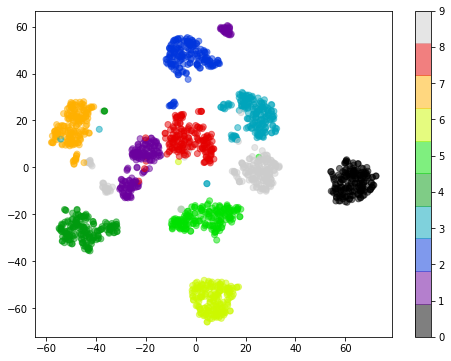

In [68]:
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()
plt.show()